## Machine Learning and Statistics Project 2020
***


The aim of this project is to create a web service that uses machine learning to make predictions based on the data set 'powerproduction'. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. Then, to develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

<br>



## Regression
***

Taking a look at the data as plotted on a scatterplot (below), my inclination would be to apply regression as a model. Given that the dataset contains only two variables, simple linear regression may be an option.  

<br>



Firstly, I import the necessary Python packages. `Numpy` to perform numeric calculations, `Pandas` for data manipulation and analysis, `Matplotlib.pyplot` for visualisation and `sklearn.model_selection` to train my model.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<br>

Next, I read in the dataset using `pandas.read_csv` which stores the data in a pandas dataframe. I assign this to the variable `pp` and output the first and final five rows to give a quick overview of the data.

In [4]:
pp = pd.read_csv('powerproduction.csv')
pp

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<br>

The `describe()` function outputs a summary of the data giving us a more nuanced overview.

In [4]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



Visualisation of the data gives us a useful preliminary indication as to what model to choose and train in order to predict. Below, I plot the data on a scatterplot. 

### Regression
Regression is a statistical method which describes the relationship between a dependent variable and one or more independent variables [1]. Additionally, it is associated with fitting a line (or curve) to the data by plotting the line over the data points to get the best fit [2]. With these two considerations in mind, regression appears to be an appropriate approach to take. Firstly, the aim of the current project is to predict wind turbine power output (*dependent variable*) based on speed values (*independent variable*). Second, taking a look data as plotted on a scatter plot, it is clear that we could fit a line (or curve) in order to accurately predict the dependent variable.

[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis <br>
[2] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>

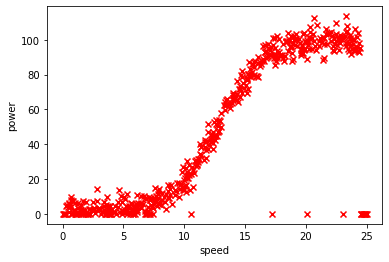

In [6]:
# Plot data on a scatter plot
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp['speed'], pp['power'], color='r', marker='x')

<br>



In [14]:
x = pp['speed']
y = pp['power']

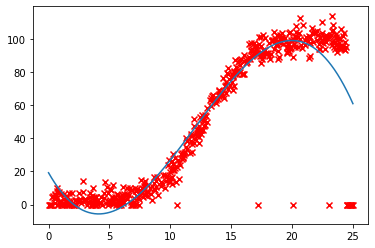

In [31]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y, color='red', marker='x')
plt.plot(myline, mymodel(myline))
plt.show()
